# Prediction

In [2]:
%%capture
!pip install ultralytics

In [9]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
from PIL import Image

In [4]:
!yolo detect predict model=yolov8n.pt source=/content/drive/MyDrive/yolo8/data/test/images/00011_jpg.rf.2f32fd89af7b99f7efaa34abbab0a392.jpg

100% 6.23M/6.23M [00:00<00:00, 194MB/s]
Ultralytics YOLOv8.0.124 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients

image 1/1 /content/drive/MyDrive/yolo8/data/test/images/00011_jpg.rf.2f32fd89af7b99f7efaa34abbab0a392.jpg: 640x640 2 persons, 7.9ms
Speed: 6.0ms preprocess, 7.9ms inference, 31.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


In [10]:
img = Image.open("/content/runs/detect/predict/00011_jpg.rf.2f32fd89af7b99f7efaa34abbab0a392.jpg")

(-0.5, 639.5, 639.5, -0.5)

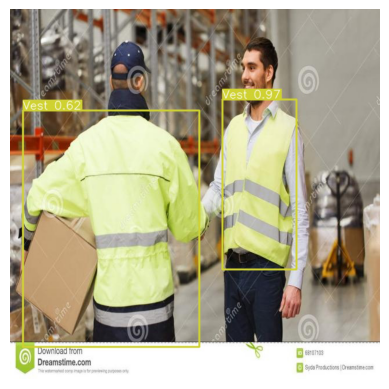

In [13]:
plt.imshow(img)
plt.axis('off')

# Training

In [5]:
!yolo detect train model=yolov8n.pt data=/content/drive/MyDrive/yolo8/data/data.yaml epochs=11 imgsz=640

Ultralytics YOLOv8.0.124 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/yolo8/data/data.yaml, epochs=11, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, in

# Validation

In [29]:
!yolo detect val model=/content/runs/detect/train/weights/best.pt data=/content/drive/MyDrive/yolo8/data/data.yaml

Ultralytics YOLOv8.0.124 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006623 parameters, 0 gradients
val: Scanning /content/drive/MyDrive/yolo8/data/valid/labels.cache... 56 images, 0 backgrounds, 0 corrupt: 100% 56/56 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 4/4 [00:05<00:00,  1.49s/it]
                   all         56        382      0.954      0.954      0.967      0.723
                Gloves         56        103      0.988      0.811      0.919       0.51
                Helmet         56         58      0.997      0.966      0.971      0.707
                Person         56         53      0.915          1      0.961      0.737
                 Shoes         56        112      0.993          1      0.995      0.793
                  Vest         56         56      0.874      0.993       0.99      0.869
Speed: 6.2ms preprocess, 29.1ms inference, 0.0ms los

# Prediction using the new model

In [6]:
!yolo detect predict model=/content/runs/detect/train/weights/best.pt source=/content/drive/MyDrive/yolo8/data/test/images/00011_jpg.rf.2f32fd89af7b99f7efaa34abbab0a392.jpg

Ultralytics YOLOv8.0.124 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006623 parameters, 0 gradients

image 1/1 /content/drive/MyDrive/yolo8/data/test/images/00011_jpg.rf.2f32fd89af7b99f7efaa34abbab0a392.jpg: 640x640 2 Vests, 17.9ms
Speed: 2.6ms preprocess, 17.9ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2


(-0.5, 639.5, 639.5, -0.5)

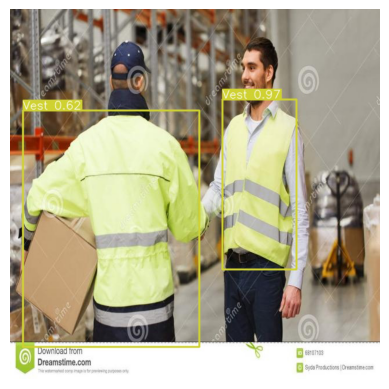

In [12]:
img = Image.open("/content/runs/detect/predict2/00011_jpg.rf.2f32fd89af7b99f7efaa34abbab0a392.jpg")

plt.imshow(img)
plt.axis('off')

In [19]:
!yolo detect predict model=/content/runs/detect/train/weights/best.pt source=/content/drive/MyDrive/yolo8/data/test/images

Ultralytics YOLOv8.0.124 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006623 parameters, 0 gradients

image 1/45 /content/drive/MyDrive/yolo8/data/test/images/00011_jpg.rf.2f32fd89af7b99f7efaa34abbab0a392.jpg: 640x640 2 Vests, 9.6ms
image 2/45 /content/drive/MyDrive/yolo8/data/test/images/00035_jpg.rf.215529b5fbd9110d1f526c045060a57b.jpg: 640x640 1 Vest, 7.3ms
image 3/45 /content/drive/MyDrive/yolo8/data/test/images/00052_jpg.rf.001a670dc3a8ccb207ea71c828e2b35c.jpg: 640x640 2 Vests, 7.3ms
image 4/45 /content/drive/MyDrive/yolo8/data/test/images/00105_jpg.rf.1a02ca4447a99d9d49beb7cdac88091e.jpg: 640x640 6 Vests, 7.3ms
image 5/45 /content/drive/MyDrive/yolo8/data/test/images/00178_jpg.rf.b440ed052ad8c3f38e8aa42d7f1e2aa5.jpg: 640x640 3 Vests, 7.3ms
image 6/45 /content/drive/MyDrive/yolo8/data/test/images/00252_jpg.rf.fed362c6967c3ab8cc4481bbb34ed0b9.jpg: 640x640 1 Vest, 7.3ms
image 7/45 /content/drive/MyDrive/yolo8/data/test/images/002

(-0.5, 639.5, 639.5, -0.5)

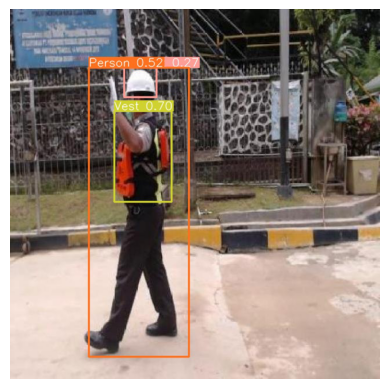

In [22]:
img = Image.open("/content/runs/detect/predict4/image_108_jpg.rf.87604fcfc7aea102fa3d39398fa2f4a4.jpg")

plt.imshow(img)
plt.axis('off')